In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from numpy import reshape
from sklearn.model_selection import train_test_split, cross_val_score
from keras.models import Sequential
from keras.layers import LSTM ,Dense, Dropout

In [63]:
node=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [64]:
node.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
node.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [66]:
node.shape

(768, 9)

In [67]:
node.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
node.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
node.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
correlation =node.corr()

<AxesSubplot:>

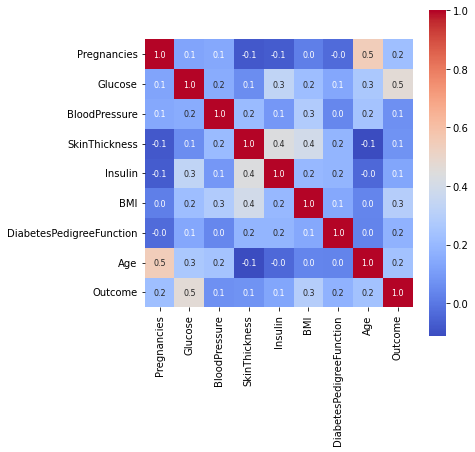

In [120]:
plt.figure(figsize =(6,6))
sns.heatmap(correlation ,cbar=True ,square=True ,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

In [72]:
print(correlation['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


**ORIGINAL SET-1**

In [73]:
X = node.drop(['Outcome'],axis=1)
Y = node['Outcome']

In [74]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [75]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [83]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
import time
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precission:",metrics.precision_score(y_test, y_pred,average='weighted'))
    print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Time',et-st)
    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

Accuracy: 0.6948051948051948
Precission: 0.6911301148879675
Recall: 0.6948051948051948
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       100
           1       0.57      0.54      0.55        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

Time 0.007212400436401367


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


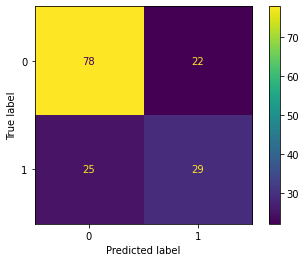

In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
classify(model)

Accuracy: 0.7662337662337663
Precission: 0.7659791189202955
Recall: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       100
           1       0.76      0.48      0.59        54

    accuracy                           0.77       154
   macro avg       0.77      0.70      0.71       154
weighted avg       0.77      0.77      0.75       154

Time 0.014759540557861328


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


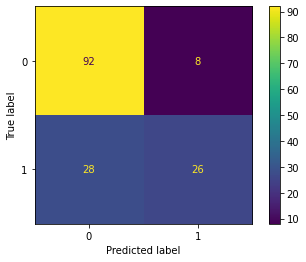

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=35)
classify(model)

Accuracy: 0.7922077922077922
Precission: 0.7918306738633417
Recall: 0.7922077922077922
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.79      0.56      0.65        54

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154

Time 0.042253732681274414


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


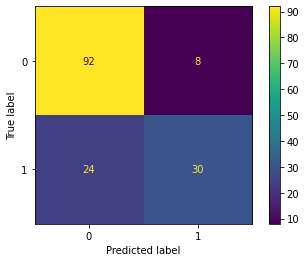

In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
classify(model)

Accuracy: 0.7662337662337663
Precission: 0.7727691663175534
Recall: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       100
           1       0.80      0.44      0.57        54

    accuracy                           0.77       154
   macro avg       0.78      0.69      0.71       154
weighted avg       0.77      0.77      0.75       154

Time 0.3007330894470215


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


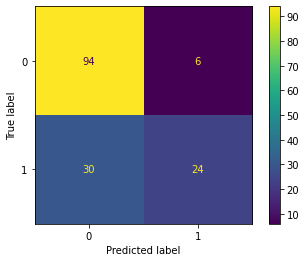

In [87]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=3)
classify(model)

Accuracy: 0.7402597402597403
Precission: 0.7337348641696468
Recall: 0.7402597402597403
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154

Time 0.23516464233398438


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


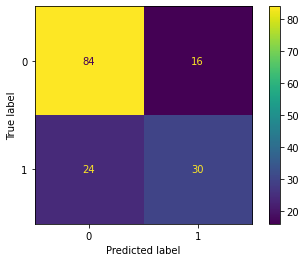

In [88]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=7)
classify(model)

In [89]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)

estimators = []

model1 = DecisionTreeClassifier(criterion='gini')
estimators.append(('cart', model1))
model2 = LogisticRegression(max_iter=5000)
estimators.append(('LR', model2))
model3 = KNeighborsClassifier(n_neighbors=35)
estimators.append(('KNN', model3))
model4 = RandomForestClassifier(n_estimators=150,max_depth=3)
estimators.append(('RF', model4))
model5 = AdaBoostClassifier(n_estimators=100, random_state=7)
estimators.append(('AdB', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7656015037593984


**PROCESSED SET-1**

In [90]:
X = node.drop(['Pregnancies','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'],axis=1)
Y = node['Outcome']

In [91]:
print(X)

     Glucose  BloodPressure
0        148             72
1         85             66
2        183             64
3         89             66
4        137             40
..       ...            ...
763      101             76
764      122             70
765      121             72
766      126             60
767       93             70

[768 rows x 2 columns]


In [92]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [93]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size = 0.2, random_state=43)

In [99]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import time
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precission:",metrics.precision_score(y_test, y_pred,average='weighted'))
    print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Time',et-st)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

Accuracy: 0.6753246753246753
Precission: 0.6677591276647881
Recall: 0.6753246753246753
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.54      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154

Time 0.005438804626464844


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


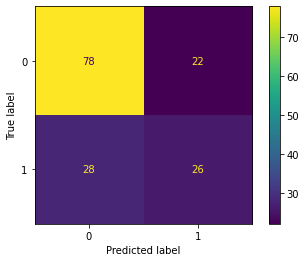

In [100]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
classify(model)

Accuracy: 0.7532467532467533
Precission: 0.7473542791147147
Recall: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

Time 0.010358333587646484


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


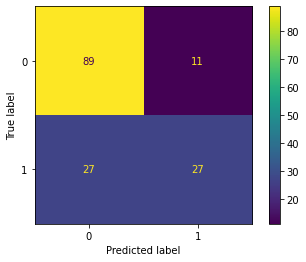

In [101]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=35)
classify(model)

Accuracy: 0.7662337662337663
Precission: 0.7621797440309238
Recall: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       100
           1       0.74      0.52      0.61        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154

Time 0.016342878341674805


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


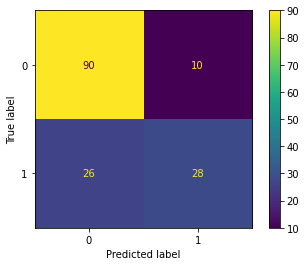

In [102]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
classify(model)


Accuracy: 0.7727272727272727
Precission: 0.7704067704067705
Recall: 0.7727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

Time 0.2654855251312256


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


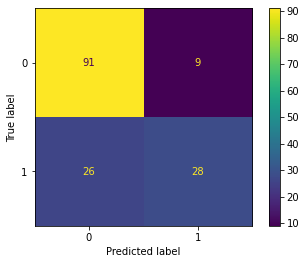

In [103]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=3)
classify(model)

Accuracy: 0.7532467532467533
Precission: 0.7465213358070502
Recall: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

Time 0.19493889808654785


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


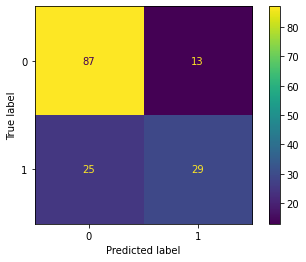

In [104]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=7)
classify(model)

In [105]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)

estimators = []

model1 = DecisionTreeClassifier(criterion='gini')
estimators.append(('cart', model1))
model2 = LogisticRegression(max_iter=5000)
estimators.append(('LR', model2))
model3 = KNeighborsClassifier(n_neighbors=35)
estimators.append(('KNN', model3))
model4 = RandomForestClassifier(n_estimators=150,max_depth=3)
estimators.append(('RF', model4))
model5 = AdaBoostClassifier(n_estimators=100, random_state=7)
estimators.append(('AdB', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7473513328776487


**Processed set-2**

In [106]:
X = node.drop(['Pregnancies','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'],axis=1)
Y = node['Outcome']

def change_values(node,Glucose,BloodPressure):
    for i in node.index:
        val1=node['Glucose'].iloc[i]
        val2=node['BloodPressure'].iloc[i]
        if (val1>155) or (val2>80):
            node['Outcome'].iloc[i]=1
        else:
            node['Outcome'].iloc[i]=0

change_values(node,'Glucose','BloodPressure')   
node

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,0


In [107]:
print(X)

     Glucose  BloodPressure
0        148             72
1         85             66
2        183             64
3         89             66
4        137             40
..       ...            ...
763      101             76
764      122             70
765      121             72
766      126             60
767       93             70

[768 rows x 2 columns]


In [108]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Outcome, Length: 768, dtype: int64


In [109]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size = 0.2, random_state=43)

In [113]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import time
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=43)
    st=time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    et=time.time()
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precission:",metrics.precision_score(y_test, y_pred,average='weighted'))
    print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Time',et-st)

    plot_confusion_matrix(model, x_test, y_test)
    plt.show()

Accuracy: 1.0
Precission: 1.0
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        50

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Time 0.0033528804779052734


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


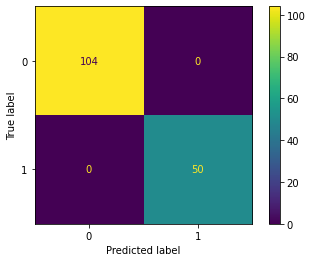

In [114]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
classify(model)

Accuracy: 0.9675324675324676
Precission: 0.9690218038841893
Recall: 0.9675324675324676
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       104
           1       1.00      0.90      0.95        50

    accuracy                           0.97       154
   macro avg       0.98      0.95      0.96       154
weighted avg       0.97      0.97      0.97       154

Time 0.013140678405761719


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


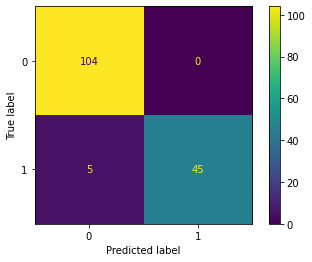

In [115]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=35)
classify(model)

Accuracy: 0.9285714285714286
Precission: 0.928789864569681
Recall: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       104
           1       0.93      0.84      0.88        50

    accuracy                           0.93       154
   macro avg       0.93      0.91      0.92       154
weighted avg       0.93      0.93      0.93       154

Time 0.01960611343383789


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


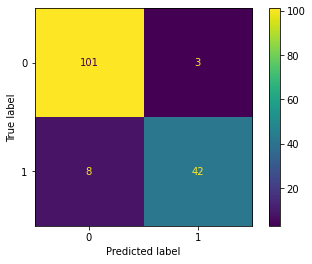

In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
classify(model)

Accuracy: 1.0
Precission: 1.0
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        50

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Time 0.2888948917388916


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


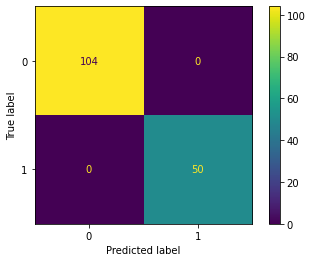

In [117]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=150,max_depth=3)
classify(model)

Accuracy: 1.0
Precission: 1.0
Recall: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        50

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Time 0.19296693801879883


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


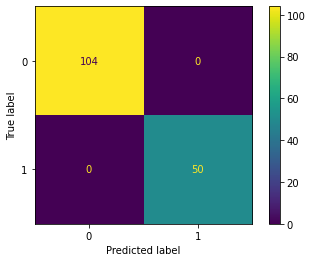

In [118]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=7)
classify(model)

In [119]:
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=None)

estimators = []

model1 = DecisionTreeClassifier(criterion='gini')
estimators.append(('cart', model1))
model2 = LogisticRegression(max_iter=5000)
estimators.append(('LR', model2))
model3 = KNeighborsClassifier(n_neighbors=35)
estimators.append(('KNN', model3))
model4 = RandomForestClassifier(n_estimators=150,max_depth=3)
estimators.append(('RF', model4))
model5 = AdaBoostClassifier(n_estimators=100, random_state=7)
estimators.append(('AdB', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

1.0
